## WeRateDogs Analysis Report

Based on twitter data pulled from the WeRateDogs archive, the purpose of this report is provide analysis and some conclusions from the data set. This data set has been cleaned and organized for easier and better analysis and stored into a csv file.

This report covers three insights.

In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#read csv file into dataframe
df = pd.read_csv('twitter_data_clean.csv')
df.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,favorites,retweets,dog_stages,rating,breed,confidence
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,36000.0,7663.0,NaN,1.3,Inconclusive,0.000000
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,31062.0,5662.0,NaN,1.3,Chihuahua,0.323581
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,23375.0,3757.0,NaN,1.2,Chihuahua,0.716012
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,39280.0,7826.0,NaN,1.3,Labrador_retriever,0.168086
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,37501.0,8434.0,NaN,1.2,basset,0.555712


Unfortunately, reading this file into a dataframe caused the index from the csv to be read as a separate unnamed column in this dataframe. This column is unneccessary, so it will be deleted.

In [13]:
#delete 'Unnamed : 0' column
df = df.drop(columns = 'Unnamed: 0')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2145 non-null   int64  
 1   in_reply_to_status_id  70 non-null     float64
 2   in_reply_to_user_id    70 non-null     float64
 3   timestamp              2145 non-null   object 
 4   source                 2145 non-null   object 
 5   text                   2145 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   name                   2145 non-null   object 
 8   favorites              2138 non-null   float64
 9   retweets               2138 non-null   float64
 10  dog_stages             343 non-null    object 
 11  rating                 2145 non-null   float64
 12  breed                  1971 non-null   object 
 13  confidence             1971 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 234.7+ 

Because data types are not stored properly when a dataframe is saved into a csv file, some adjustments need to be made in the clean data set.

In [26]:
#change timestamp to datetime object
df.timestamp = pd.to_datetime(df.timestamp)

## Insight #1

Now, something interesting to observe how popular each dog stage is amongst those tweeted. So to do this, we will get the value counts of each dog stage and display them in a pie chart.

In [17]:
df.dog_stages.value_counts()

pupper           223
doggo             75
puppo             24
doggo/pupper      10
floofer            9
doggo/puppo        1
doggo/floofer      1
Name: dog_stages, dtype: int64

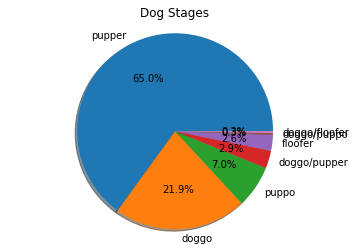

In [25]:
#Create arrays for dog stages and values for each
dogstage = ['pupper', 'doggo', 'puppo', 'doggo/pupper', 'floofer', 'doggo/puppo', 'doggo/floofer']
values = [223, 75, 24, 10, 9, 1, 1]

#plot values
plt.pie(values, labels = dogstage, autopct='%1.1f%%', shadow=True)
plt.title('Dog Stages')
plt.axis('equal')
plt.show()

Based on data, it seems that amongst the tweet data that specified a dog stage, that puppers tend to be the most tweeted dog type (at 65%).

## Insight #2

Another interesting thing to look at is the relationship between the rating of a dog and the number of retweets that the dog gets, so for this we will create a scatterplot that compares the two with each other.

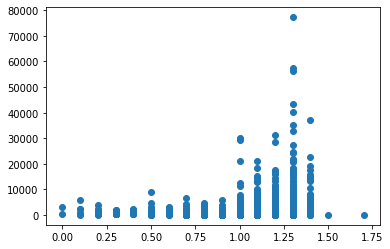

In [35]:
plt.scatter(data=df, y='retweets', x='rating')

Based on the above scatter plot, it would appear that there is a positive correlation between the rating that a dog receives and the number of retweets that the dog gets.

## Insight #3

Lastly, it would be interesting to know what breed of dog is being tweeted the most. This may serve as an indicator of what kind of breed that people in general like the most.

In [34]:
df.breed.value_counts()

Inconclusive            305
golden_retriever        154
Labrador_retriever      105
Pembroke                 95
Chihuahua                90
                       ... 
Japanese_spaniel          1
Bouvier_des_Flandres      1
silky_terrier             1
EntleBucher               1
Scotch_terrier            1
Name: breed, Length: 113, dtype: int64

Based on the value counts of the dog breed, it would also appear that Golden Retrievers are tweeted the most.